In [71]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

import math

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

# import the dataset from .csv file
print(os.getcwd())
os.chdir("D:\\DWDM")
f_read = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv",sep=',', error_bad_lines=False, index_col=False, dtype='unicode')
"""
sep : the value seperator in the imported file
error_bad_lines : Error raised on too many seperators in inmported file if True, not raised if False
index_col : List of attributes to use as column headers; forces pandas not to use first row as headers if set to False
dtype : encoding of imported file
"""

# Selecting relevant columns from imported file
data_set=f_read.loc[:,['Created Date', 'Closed Date', 'Agency', 'Complaint Type','Location Type','City',
                 'Facility Type','Status', 'Due Date','Resolution Action Updated Date','Borough','Park Borough']]
data_set.columns=['Created_Date', 'Closed_Date', 'Agency', 'Complaint_Type','Location_Type','City',
                 'Facility_Type','Status', 'Due_Date','Resolution_Action_Upd_Date','Borough','Park_Borough']



D:\DWDM


In [72]:
# Listing all possible values of attributes

print("Agency :\n", data_set['Agency'].unique(), end="\n\n")
print("Complaint types :\n", data_set['Complaint_Type'].unique(), end="\n\n")
print("Location types :\n", data_set['Location_Type'].unique(), end="\n\n")
print("Facility types :\n", data_set['Facility_Type'].unique(), end="\n\n")
print("Statuses :\n", data_set['Status'].unique(), end="\n\n")
print("Cities :\n", data_set['City'].unique(), end="\n\n")
print("Boroughs :\n", data_set['Borough'].unique(), end="\n\n")
print("Park Boroughs :\n", data_set['Park_Borough'].unique(), end="\n\n")

Agency :
 ['NYPD' nan]

Complaint types :
 ['Noise - Street/Sidewalk' 'Blocked Driveway' 'Illegal Parking'
 'Derelict Vehicle' 'Noise - Commercial' 'Noise - House of Worship'
 'Posting Advertisement' 'Noise - Vehicle' 'Animal Abuse' 'Vending'
 'Traffic' 'Drinking' 'Bike/Roller/Skate Chronic' 'Panhandling'
 'Noise - Park' 'Homeless Encampment' 'Urinating in Public' 'Graffiti'
 'Disorderly Youth' 'Illegal Fireworks' 'Ferry Complaint' nan]

Location types :
 ['Street/Sidewalk' 'Club/Bar/Restaurant' 'Store/Commercial'
 'House of Worship' 'Residential Building/House' 'Residential Building'
 'Park/Playground' 'Vacant Lot' 'House and Store' 'Highway' 'Commercial'
 'Parking Lot' 'Terminal' 'Subway Station' 'Roadway Tunnel' nan]

Facility types :
 ['Precinct' nan]

Statuses :
 ['Closed' 'Open' 'Assigned' nan]

Cities :
 ['NEW YORK' 'ASTORIA' 'BRONX' 'ELMHURST' 'BROOKLYN' 'KEW GARDENS'
 'JACKSON HEIGHTS' 'MIDDLE VILLAGE' 'REGO PARK' 'SAINT ALBANS' 'JAMAICA'
 'SOUTH RICHMOND HILL' nan 'RIDGEWOOD'

In [73]:
# checking frequency of complaint type per city
city_complaint_type=data_set.groupby(['City','Complaint_Type'])
print(city_complaint_type.size())

City      Complaint_Type         
ARVERNE   Animal Abuse                3
          Derelict Vehicle            1
          Illegal Parking             6
          Noise - Commercial          1
          Noise - Street/Sidewalk     2
                                     ..
WOODSIDE  Noise - Street/Sidewalk    18
          Noise - Vehicle            12
          Traffic                     1
          Vending                     2
Woodside  Illegal Parking             1
Length: 445, dtype: int64


In [74]:
# List of number of complaints of all complaint types
complaint_type = data_set.groupby('Complaint_Type')
complaint_analysis=complaint_type.size()
print(complaint_type.size())

Complaint_Type
Animal Abuse                  616
Bike/Roller/Skate Chronic      35
Blocked Driveway             5755
Derelict Vehicle             1335
Disorderly Youth               19
Drinking                      111
Ferry Complaint                 1
Graffiti                        5
Homeless Encampment           357
Illegal Fireworks               5
Illegal Parking              5552
Noise - Commercial           2024
Noise - House of Worship       85
Noise - Park                  351
Noise - Street/Sidewalk      4083
Noise - Vehicle              1279
Panhandling                    26
Posting Advertisement          48
Traffic                       218
Urinating in Public            44
Vending                       349
dtype: int64


In [75]:
# Convert series generated in above cell to dataframe
df=complaint_analysis.to_frame().reset_index()
df.columns=['Complaint_Type','FREQ']
df

,Complaint_Type,FREQ
0,Animal Abuse,616
1,Bike/Roller/Skate Chronic,35
2,Blocked Driveway,5755
3,Derelict Vehicle,1335
4,Disorderly Youth,19
5,Drinking,111
6,Ferry Complaint,1
7,Graffiti,5
8,Homeless Encampment,357
9,Illegal Fireworks,5


In [76]:
sort_1=df.sort_values('FREQ',ascending=False)    # sort complaint types in ascending order of their frequenct

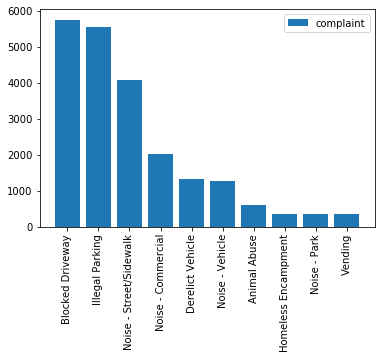

In [77]:
# plot bar graph - complaint type v/s frequency
top10=sort_1.head(10)
top10
x=range(10)
plt.bar(top10.Complaint_Type, top10.FREQ)
plt.xticks(x, top10.Complaint_Type, rotation='vertical')
plt.legend(['complaint'])
plt.show()


In [78]:
print(data_set.isnull().sum())    # Number of null values in all Columns

Created_Date                  164824
Closed_Date                   165084
Agency                        164824
Complaint_Type                164824
Location_Type                 164824
City                          165107
Facility_Type                 165084
Status                        164824
Due_Date                      164825
Resolution_Action_Upd_Date    165081
Borough                       164824
Park_Borough                  164824
dtype: int64


In [79]:
print(data_set.dtypes)    # Data types of each Column

Created_Date                  object
Closed_Date                   object
Agency                        object
Complaint_Type                object
Location_Type                 object
City                          object
Facility_Type                 object
Status                        object
Due_Date                      object
Resolution_Action_Upd_Date    object
Borough                       object
Park_Borough                  object
dtype: object


In [80]:
data_set = data_set.dropna(how='all')


In [81]:
print(data_set.isnull().sum())

Created_Date                    0
Closed_Date                   260
Agency                          0
Complaint_Type                  0
Location_Type                   0
City                          283
Facility_Type                 260
Status                          0
Due_Date                        1
Resolution_Action_Upd_Date    257
Borough                         0
Park_Borough                    0
dtype: int64


In [82]:
# replace all null values in column "City" with "Unkown"
data_set['City'].fillna('Unknown',inplace=True)
data_set['City']

0         NEW YORK
1          ASTORIA
2            BRONX
3            BRONX
4         ELMHURST
           ...    
22293    BELLEROSE
22294     NEW YORK
22295     BROOKLYN
22296     BROOKLYN
22297     NEW YORK
Name: City, Length: 22298, dtype: object

In [83]:
# Compute mode of Facility type
a=data_set['Facility_Type'].mode()[0]
a

# Replace all null values in "Facility Type" with the modal value
data_set['Facility_Type'].fillna(a,inplace=True)
data_set['Facility_Type']

0        Precinct
1        Precinct
2        Precinct
3        Precinct
4        Precinct
           ...   
22293    Precinct
22294    Precinct
22295    Precinct
22296    Precinct
22297    Precinct
Name: Facility_Type, Length: 22298, dtype: object

In [84]:
# Compute mode of "Location Type" column
data_set['Location_Type']
b=data_set['Location_Type'].mode()[0]
print(b)

# Replace all null values in "Location Type" with the computed modal value
data_set['Location_Type'].fillna(b,inplace=True)
data_set['Location_Type']

Street/Sidewalk


0        Street/Sidewalk
1        Street/Sidewalk
2        Street/Sidewalk
3        Street/Sidewalk
4        Street/Sidewalk
              ...       
22293    Street/Sidewalk
22294    Street/Sidewalk
22295    Street/Sidewalk
22296    Street/Sidewalk
22297    Street/Sidewalk
Name: Location_Type, Length: 22298, dtype: object

In [85]:
# Replace all null values in "Agency" with the modal value
data_set['Agency'].fillna(data_set['Agency'].mode()[0],inplace=True)
data_set['Agency']

0        NYPD
1        NYPD
2        NYPD
3        NYPD
4        NYPD
         ... 
22293    NYPD
22294    NYPD
22295    NYPD
22296    NYPD
22297    NYPD
Name: Agency, Length: 22298, dtype: object

In [86]:
# Compute mode of "Complaint Type"
ct=data_set['Complaint_Type'].mode()[0]
ct

# Replace all null values in "Complaint Type" with the modal value
data_set['Complaint_Type'].fillna(ct,inplace=True)
data_set['Complaint_Type']

0        Noise - Street/Sidewalk
1               Blocked Driveway
2               Blocked Driveway
3                Illegal Parking
4                Illegal Parking
                  ...           
22293           Derelict Vehicle
22294    Noise - Street/Sidewalk
22295            Illegal Parking
22296           Blocked Driveway
22297            Illegal Parking
Name: Complaint_Type, Length: 22298, dtype: object

In [87]:
# replace all null values in column "Status" with "Unkown"
data_set['Status'].fillna('Unknown',inplace=True)
data_set['Status']

0        Closed
1        Closed
2        Closed
3        Closed
4        Closed
          ...  
22293    Closed
22294    Closed
22295    Closed
22296    Closed
22297    Closed
Name: Status, Length: 22298, dtype: object

In [88]:
# Compute mode of "Borough"
br=data_set['Borough'].mode()[0]
print(br)

# Replace all null values in "Borough" with the modal value
data_set['Borough'].fillna(br,inplace=True)
data_set['Borough']

BROOKLYN


0        MANHATTAN
1           QUEENS
2            BRONX
3            BRONX
4           QUEENS
           ...    
22293       QUEENS
22294    MANHATTAN
22295     BROOKLYN
22296     BROOKLYN
22297    MANHATTAN
Name: Borough, Length: 22298, dtype: object

In [89]:
# Compute mode of "Park Borough"
pbr=data_set['Park_Borough'].mode()[0]
print(pbr)

# Replace all null values in "Park Borough" with the modal value
data_set['Park_Borough'].fillna(pbr,inplace=True)
data_set['Park_Borough']

BROOKLYN


0        MANHATTAN
1           QUEENS
2            BRONX
3            BRONX
4           QUEENS
           ...    
22293       QUEENS
22294    MANHATTAN
22295     BROOKLYN
22296     BROOKLYN
22297    MANHATTAN
Name: Park_Borough, Length: 22298, dtype: object

In [90]:
Complaint_per_city=data_set.groupby('City')
print(Complaint_per_city.size())
Complaint_per_city_analysis=Complaint_per_city.size()
df2=Complaint_per_city_analysis.to_frame().reset_index()
df2.columns=['City','Overall Complaints']
df2

City
ARVERNE                  15
ASTORIA                 407
Astoria                  40
BAYSIDE                  79
BELLEROSE                35
BREEZY POINT              2
BRONX                  3467
BROOKLYN               6947
CAMBRIA HEIGHTS          26
CENTRAL PARK              7
COLLEGE POINT           103
CORONA                  364
EAST ELMHURST           187
ELMHURST                208
FAR ROCKAWAY            108
FLORAL PARK              12
FLUSHING                455
FOREST HILLS            106
FRESH MEADOWS           135
GLEN OAKS                25
HOLLIS                   82
HOWARD BEACH            104
JACKSON HEIGHTS         120
JAMAICA                 576
KEW GARDENS              51
LITTLE NECK              44
LONG ISLAND CITY        153
Long Island City         10
MASPETH                 188
MIDDLE VILLAGE          137
NEW HYDE PARK             5
NEW YORK               4588
OAKLAND GARDENS          35
OZONE PARK              220
QUEENS VILLAGE          119
REGO PARK      

,City,Overall Complaints
0,ARVERNE,15
1,ASTORIA,407
2,Astoria,40
3,BAYSIDE,79
4,BELLEROSE,35
5,BREEZY POINT,2
6,BRONX,3467
7,BROOKLYN,6947
8,CAMBRIA HEIGHTS,26
9,CENTRAL PARK,7


<BarContainer object of 51 artists>

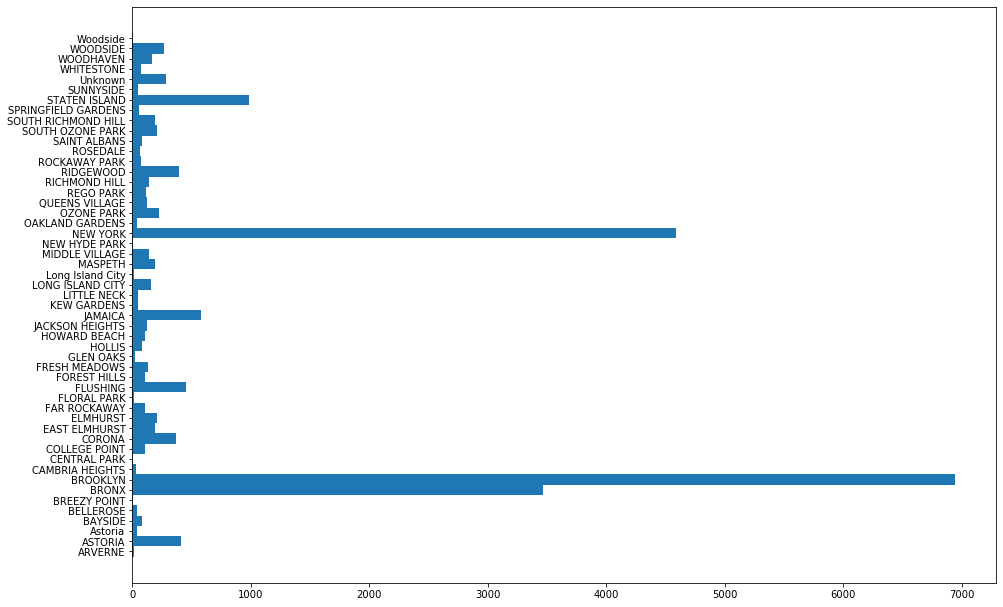

In [91]:
canvas = plt.figure()
axis1=canvas.add_axes([1,1,2,2])
axis1.barh(df2['City'],df2['Overall Complaints'],height=1.0,align='center')

In [92]:
# Status per city
city=data_set.groupby(['Status','City'])
df3 = city.size().to_frame().reset_index()
df3.columns=['Status','City','Complaints']
df3.set_index('Status')

assigned_city = df3.iloc[:2,1]
closed_city = df3.iloc[2:52,1]
open_city = df3.iloc[52:,1]

assigned_num = df3.iloc[:2,2]
closed_num = df3.iloc[2:52,2]
open_num = df3.iloc[52:,2]


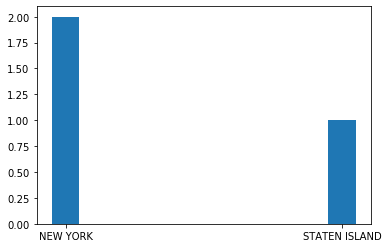

In [93]:
assigned =plt.bar(assigned_city,assigned_num,width = .1)

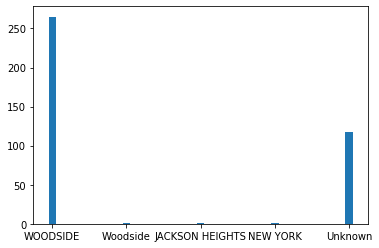

In [94]:
opened =plt.bar(open_city,open_num,width = .1)

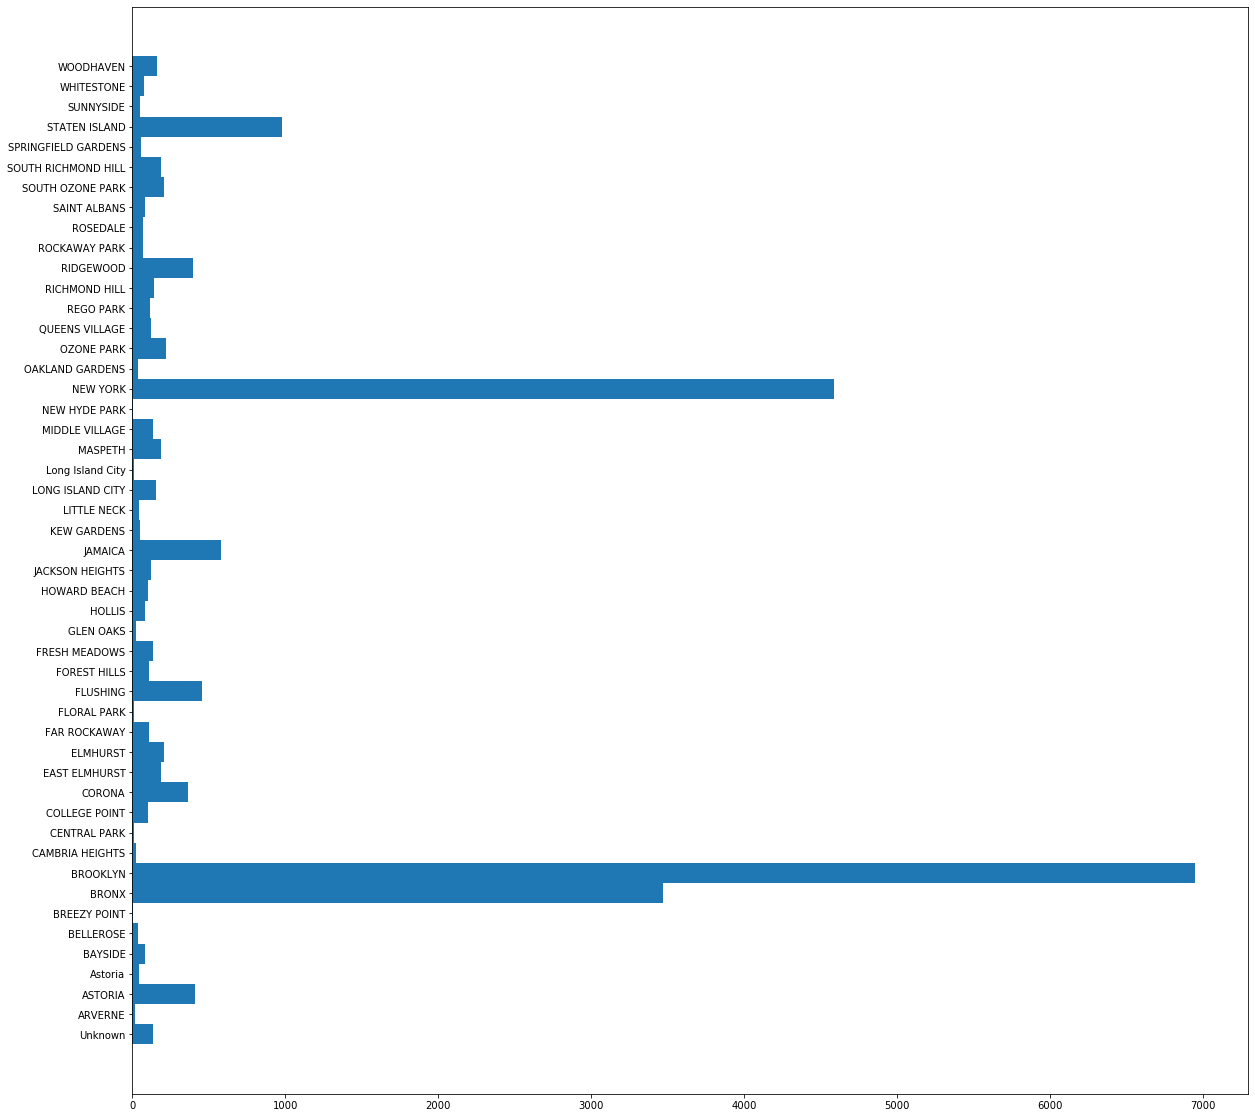

In [95]:
canvas3 = plt.figure(figsize=(20,20))
closed =plt.barh(closed_city,closed_num,height = 1)

In [96]:
lbe=LabelEncoder()    # Encoder required to encode string values into integers so that they can be fed to the algorithm

In [97]:
# encode string values in "Agency" to integer values
agencies = data_set['Agency'].unique()
data_set['Agency']=lbe.fit_transform(data_set['Agency'])
print(*map(lambda x: f"{agencies[x]} : {lbe.transform([agencies[x]])}", range(len(agencies))), sep='\n')

NYPD : [0]


In [98]:
# encode string values in "Complaint Type" to integer values
complaint_types = data_set['Complaint_Type'].unique()
data_set['Complaint_Type']=lbe.fit_transform(data_set['Complaint_Type'])
print(*map(lambda x: f"{complaint_types[x]} : {lbe.transform([complaint_types[x]])}", range(len(complaint_types))), sep='\n')

Noise - Street/Sidewalk : [14]
Blocked Driveway : [2]
Illegal Parking : [10]
Derelict Vehicle : [3]
Noise - Commercial : [11]
Noise - House of Worship : [12]
Posting Advertisement : [17]
Noise - Vehicle : [15]
Animal Abuse : [0]
Vending : [20]
Traffic : [18]
Drinking : [5]
Bike/Roller/Skate Chronic : [1]
Panhandling : [16]
Noise - Park : [13]
Homeless Encampment : [8]
Urinating in Public : [19]
Graffiti : [7]
Disorderly Youth : [4]
Illegal Fireworks : [9]
Ferry Complaint : [6]


In [99]:
# encode string values in "Location Type" to integer values
location_types = data_set['Location_Type'].unique()
data_set['Location_Type']=lbe.fit_transform(data_set['Location_Type'])
print(*map(lambda x: f"{location_types[x]} : {lbe.transform([location_types[x]])}", range(len(location_types))), sep='\n')

Street/Sidewalk : [11]
Club/Bar/Restaurant : [0]
Store/Commercial : [10]
House of Worship : [4]
Residential Building/House : [8]
Residential Building : [7]
Park/Playground : [5]
Vacant Lot : [14]
House and Store : [3]
Highway : [2]
Commercial : [1]
Parking Lot : [6]
Terminal : [13]
Subway Station : [12]
Roadway Tunnel : [9]


In [100]:
# encode string values in "City" to integer values
cities = data_set['City'].unique()
data_set['City']=lbe.fit_transform(data_set['City'])
print(*map(lambda x: f"{cities[x]} : {lbe.transform([cities[x]])}", range(len(cities))), sep='\n')

NEW YORK : [31]
ASTORIA : [1]
BRONX : [6]
ELMHURST : [13]
BROOKLYN : [7]
KEW GARDENS : [24]
JACKSON HEIGHTS : [22]
MIDDLE VILLAGE : [29]
REGO PARK : [35]
SAINT ALBANS : [40]
JAMAICA : [23]
SOUTH RICHMOND HILL : [42]
Unknown : [46]
RIDGEWOOD : [37]
HOWARD BEACH : [21]
FOREST HILLS : [17]
STATEN ISLAND : [44]
OZONE PARK : [33]
RICHMOND HILL : [36]
WOODHAVEN : [48]
FLUSHING : [16]
CORONA : [11]
QUEENS VILLAGE : [34]
OAKLAND GARDENS : [32]
HOLLIS : [20]
MASPETH : [28]
EAST ELMHURST : [12]
SOUTH OZONE PARK : [41]
WOODSIDE : [49]
FRESH MEADOWS : [18]
LONG ISLAND CITY : [26]
ROCKAWAY PARK : [38]
SPRINGFIELD GARDENS : [43]
COLLEGE POINT : [10]
BAYSIDE : [3]
GLEN OAKS : [19]
FAR ROCKAWAY : [14]
BELLEROSE : [4]
LITTLE NECK : [25]
CAMBRIA HEIGHTS : [8]
ROSEDALE : [39]
SUNNYSIDE : [45]
WHITESTONE : [47]
ARVERNE : [0]
FLORAL PARK : [15]
NEW HYDE PARK : [30]
Astoria : [2]
CENTRAL PARK : [9]
BREEZY POINT : [5]
Long Island City : [27]
Woodside : [50]


In [101]:
# encode string values in "Facility Type" to integer values
facility_types = data_set['Facility_Type'].unique()
data_set['Facility_Type']=lbe.fit_transform(data_set['Facility_Type'])
print(*map(lambda x: f"{facility_types[x]} : {lbe.transform([facility_types[x]])}", range(len(facility_types))), sep='\n')

Precinct : [0]


In [102]:
# encode string values in "Borough" to integer values
boroughs = data_set['Borough'].unique()
data_set['Borough']=lbe.fit_transform(data_set['Borough'])
print(*map(lambda x: f"{boroughs[x]} : {lbe.transform([boroughs[x]])}", range(len(boroughs))), sep='\n')

MANHATTAN : [2]
QUEENS : [3]
BRONX : [0]
BROOKLYN : [1]
Unspecified : [5]
STATEN ISLAND : [4]


In [103]:
# encode string values in "Park Borough" to integer values
park_boroughs = data_set['Park_Borough'].unique()
data_set['Park_Borough']=lbe.fit_transform(data_set['Park_Borough'])
print(*map(lambda x: f"{park_boroughs[x]} : {lbe.transform([park_boroughs[x]])}", range(len(park_boroughs))), sep='\n')

MANHATTAN : [2]
QUEENS : [3]
BRONX : [0]
BROOKLYN : [1]
Unspecified : [5]
STATEN ISLAND : [4]


In [104]:
# encode string values in "Status" to integer values
sts=data_set['Status'].unique()
data_set['Status']=lbe.fit_transform(data_set['Status'])
print(*map(lambda x: f"{sts[x]} : {lbe.transform([sts[x]])}", range(len(sts))), sep='\n')

Closed : [1]
Open : [2]
Assigned : [0]


In [105]:
print(data_set.describe())    # describe encoded dataset

        Agency  Complaint_Type  Location_Type          City  Facility_Type  \
count  22298.0    22298.000000   22298.000000  22298.000000        22298.0   
mean       0.0        8.602072      10.271549     18.763073            0.0   
std        0.0        5.265001       2.371710     14.072244            0.0   
min        0.0        0.000000       0.000000      0.000000            0.0   
25%        0.0        2.000000      11.000000      7.000000            0.0   
50%        0.0       10.000000      11.000000     11.000000            0.0   
75%        0.0       14.000000      11.000000     31.000000            0.0   
max        0.0       20.000000      14.000000     50.000000            0.0   

             Status       Borough  Park_Borough  
count  22298.000000  22298.000000  22298.000000  
mean       0.999103      1.773433      1.773433  
std        0.107981      1.200704      1.200704  
min        0.000000      0.000000      0.000000  
25%        1.000000      1.000000      1.000000

In [106]:
print(data_set.dtypes)    # display datatype of all columns

Created_Date                  object
Closed_Date                   object
Agency                         int32
Complaint_Type                 int32
Location_Type                  int32
City                           int32
Facility_Type                  int32
Status                         int32
Due_Date                      object
Resolution_Action_Upd_Date    object
Borough                        int32
Park_Borough                   int32
dtype: object


In [107]:
# drop all columns that are not necessary
data_set.drop(['Created_Date','Closed_Date','Due_Date','Facility_Type','Resolution_Action_Upd_Date','Agency','Park_Borough'],axis=1,inplace = True)
data_set

,Complaint_Type,Location_Type,City,Status,Borough
0,14,11,31,1,2
1,2,11,1,1,3
2,2,11,6,1,0
3,10,11,6,1,0
4,10,11,13,1,3
...,...,...,...,...,...
22293,3,11,4,1,3
22294,14,11,31,1,2
22295,10,11,7,1,1
22296,2,11,7,1,1


In [108]:
status=data_set['Status']
status

0        1
1        1
2        1
3        1
4        1
        ..
22293    1
22294    1
22295    1
22296    1
22297    1
Name: Status, Length: 22298, dtype: int32

In [109]:
data_set.drop(['Status'],axis=1,inplace=True)
data_set

,Complaint_Type,Location_Type,City,Borough
0,14,11,31,2
1,2,11,1,3
2,2,11,6,0
3,10,11,6,0
4,10,11,13,3
...,...,...,...,...
22293,3,11,4,3
22294,14,11,31,2
22295,10,11,7,1
22296,2,11,7,1


In [110]:
data_set['Status']=status
data_set

,Complaint_Type,Location_Type,City,Borough,Status
0,14,11,31,2,1
1,2,11,1,3,1
2,2,11,6,0,1
3,10,11,6,0,1
4,10,11,13,3,1
...,...,...,...,...,...
22293,3,11,4,3,1
22294,14,11,31,2,1
22295,10,11,7,1,1
22296,2,11,7,1,1


In [111]:
x=data_set[['Complaint_Type','Location_Type','City','Borough']]    # independent variable
x

,Complaint_Type,Location_Type,City,Borough
0,14,11,31,2
1,2,11,1,3
2,2,11,6,0
3,10,11,6,0
4,10,11,13,3
...,...,...,...,...
22293,3,11,4,3
22294,14,11,31,2
22295,10,11,7,1
22296,2,11,7,1


In [112]:
y=data_set['Status']    # dependent variable
y

0        1
1        1
2        1
3        1
4        1
        ..
22293    1
22294    1
22295    1
22296    1
22297    1
Name: Status, Length: 22298, dtype: int32

In [113]:
print(y.isnull().sum())    # check for null variables in dependent

0


In [114]:
# Splitting data for algorithm
X_train,X_test,y_train,y_test = model_selection.train_test_split(x,y,test_size=0.3,random_state=42)

In [115]:
print(X_train.shape)

(15608, 4)


In [116]:
print(y_train.shape)

(15608,)


In [117]:
print(X_test.shape)

(6690, 4)


In [118]:
print(y_test.shape)

(6690,)


In [119]:
# Using standard scaler to scale data
ss= StandardScaler()
XX_train=ss.fit_transform(X_train)
XX_test=ss.fit_transform(X_test)

In [120]:
print(len(y))

22298


In [121]:
print(math.sqrt(len(y_test)) )

81.79242018671412


In [122]:
# Train Model - K Nearest Neighbors
category= KNeighborsClassifier(n_neighbors=20)
category.fit(XX_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [123]:
y_predict=category.predict(XX_test)
print(y_predict)

[1 1 1 ... 1 1 1]


In [124]:
accuracy_score(y_test,y_predict)    # Accuracy of KNN

0.9917787742899851

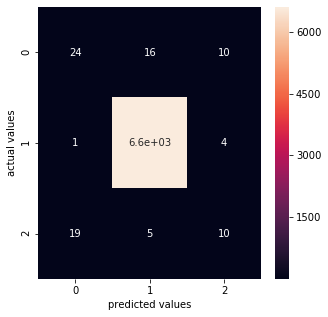

In [125]:
cm=confusion_matrix(y_test,y_predict)
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True)
plt.xlabel("predicted values")
plt.ylabel("actual values")
plt.show()

In [126]:
data_set

,Complaint_Type,Location_Type,City,Borough,Status
0,14,11,31,2,1
1,2,11,1,3,1
2,2,11,6,0,1
3,10,11,6,0,1
4,10,11,13,3,1
...,...,...,...,...,...
22293,3,11,4,3,1
22294,14,11,31,2,1
22295,10,11,7,1,1
22296,2,11,7,1,1


In [127]:
from sklearn.tree import DecisionTreeClassifier

X_train,X_test,y_train,y_test=model_selection.train_test_split(x,y,random_state=42,test_size=0.3)

In [128]:
# Train model - Decision Tree
dtclf=DecisionTreeClassifier(criterion='entropy')
dtclf.fit(X_train,y_train)
y_pred_dc = dtclf.predict(X_test)
print(y_pred_dc)


[1 1 1 ... 1 1 1]


In [129]:
print(accuracy_score(y_test,y_pred_dc))    # Accuracy of Decision Tree

0.9935724962630792


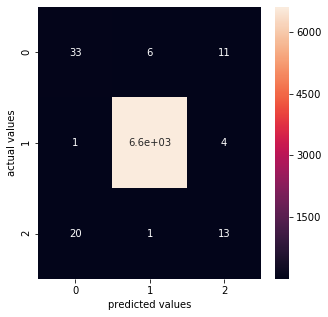

In [130]:
cm=confusion_matrix(y_test,y_pred_dc)
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True)
plt.xlabel("predicted values")
plt.ylabel("actual values")
plt.show()

In [131]:
from sklearn.ensemble import RandomForestClassifier
X_train,X_test,y_train,y_test=model_selection.train_test_split(x,y,random_state=42,test_size=0.3)

In [138]:
rfclf=RandomForestClassifier( n_estimators=100,criterion='entropy')

In [139]:
rfclf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [140]:
y_pred_rf = rfclf.predict(X_test)
print(y_pred_rf)

[1 1 1 ... 1 1 1]


In [141]:
print(accuracy_score(y_test,y_pred_rf))

0.9935724962630792


In [142]:
print(rfclf.score(X_test,y_test))

0.9935724962630792


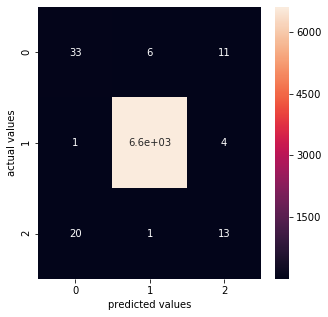

In [143]:
cm=confusion_matrix(y_test,y_pred_rf)
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True)
plt.xlabel("predicted values")
plt.ylabel("actual values")
plt.show()